# Dataset Downloading

> Importing dataset from Kaggle

In [25]:
# ! pip install kaggle

In [26]:
# ! kaggle datasets download -d fedesoriano/heart-failure-prediction

In [27]:
# ! cd 

In [28]:
# import zipfile
# with zipfile.ZipFile('heart-failure-prediction.zip', 'r') as zip_ref:
#     zip_ref.extractall("HeartFailure")

# Importing Libraries

In [58]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error, confusion_matrix, f1_score, recall_score, roc_auc_score, precision_score, accuracy_score, classification_report

In [30]:
df = pd.read_csv('./HeartFailure/heart.csv')
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [31]:
df.shape

(918, 12)

In [32]:
df.HeartDisease.value_counts()

1    508
0    410
Name: HeartDisease, dtype: int64

In [33]:
print(df.dtypes == 'object')

Age               False
Sex                True
ChestPainType      True
RestingBP         False
Cholesterol       False
FastingBS         False
RestingECG         True
MaxHR             False
ExerciseAngina     True
Oldpeak           False
ST_Slope           True
HeartDisease      False
dtype: bool


In [34]:
df.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

# Data Manipulation

> Checking the data for Inconsistensies and or any NULL values.

In [35]:
obj_cols = [cols for cols in df.columns if df[cols].dtype == 'object']
obj_cols

['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']

In [36]:
df2 = df.drop(columns=['RestingECG', 'ST_Slope'])

In [37]:
obj_cols = [cols for cols in df2.columns if df2[cols].dtype == 'object']
obj_cols

['Sex', 'ChestPainType', 'ExerciseAngina']

In [38]:
df2

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,HeartDisease
0,40,M,ATA,140,289,0,172,N,0.0,0
1,49,F,NAP,160,180,0,156,N,1.0,1
2,37,M,ATA,130,283,0,98,N,0.0,0
3,48,F,ASY,138,214,0,108,Y,1.5,1
4,54,M,NAP,150,195,0,122,N,0.0,0
...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,132,N,1.2,1
914,68,M,ASY,144,193,1,141,N,3.4,1
915,57,M,ASY,130,131,0,115,Y,1.2,1
916,57,F,ATA,130,236,0,174,N,0.0,1


# Data Visualization

In [39]:
sns.dark_palette("#69d", reverse=True, as_cmap=True)

<AxesSubplot:xlabel='Sex', ylabel='HeartDisease'>

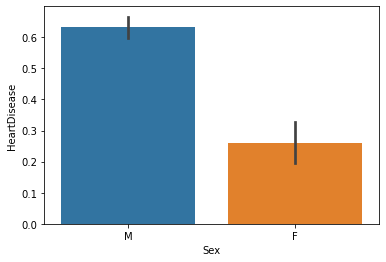

In [40]:
sns.barplot(x = 'Sex', y = 'HeartDisease', data=df2)

<AxesSubplot:xlabel='Sex', ylabel='Age'>

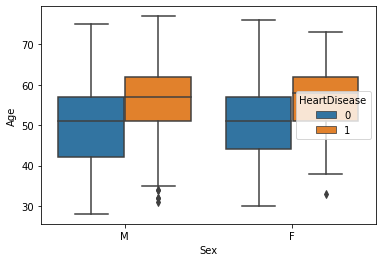

In [41]:
sns.boxplot(x="Sex",y="Age", hue="HeartDisease", data=df2)

<AxesSubplot:xlabel='Sex', ylabel='Age'>

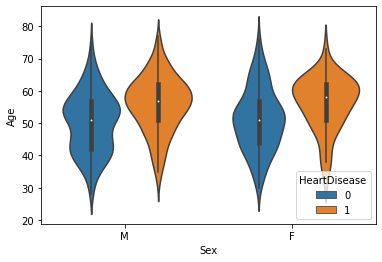

In [42]:
sns.violinplot(x="Sex",y="Age", hue="HeartDisease", data=df2)

<AxesSubplot:xlabel='MaxHR', ylabel='Cholesterol'>

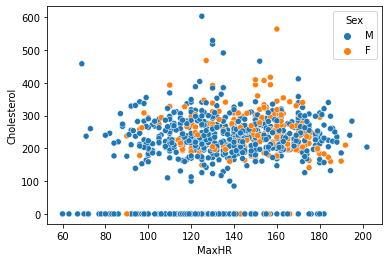

In [43]:
sns.scatterplot(x='MaxHR', y = 'Cholesterol', hue = 'Sex', data = df2)

## Manually Imputing the values

In [44]:
df2['Sex'] = df.Sex.replace({'M': 0, 'F': 1})
df2['ChestPainType'] = df.ChestPainType.replace({'ATA': 0, 'NAP': 1, 'ASY': 2, 'TA': 3})
df2['ExerciseAngina'] = df.ExerciseAngina.replace({'Y': 1, 'N': 0})

# Modeling

### Spitting the Dataset

In [50]:
feats = ['Age', 'Sex', 'ChestPainType', 'ExerciseAngina', 'MaxHR', 'Cholesterol']

X = df2[feats]
y = df2.HeartDisease

In [51]:
train_X, val_X, train_y, val_y = train_test_split(X, y, test_size=0.2, random_state=0)

In [52]:
pipeline_lr = Pipeline(steps=[
    ('scale', StandardScaler()),
    ('model_lr', LinearRegression())])

pipeline_lor = Pipeline(steps=[
    ('scale', StandardScaler()),
    ('model_lor', LogisticRegression())])

pipeline_dt = Pipeline(steps=[
    ('scale', StandardScaler()),
    ('model_dt', DecisionTreeClassifier())])

pipeline_rf = Pipeline(steps=[
    ('scale', StandardScaler()),
    ('model_rf', RandomForestClassifier())])

In [53]:
pipeline_lr.fit(train_X, train_y)
pipeline_lor.fit(train_X, train_y)
pipeline_dt.fit(train_X, train_y)
pipeline_rf.fit(train_X, train_y)

Pipeline(steps=[('scale', StandardScaler()),
                ('model_rf', RandomForestClassifier())])

In [54]:
p_lr = pipeline_lr.predict(val_X)
p_lor = pipeline_lor.predict(val_X)
p_dt = pipeline_dt.predict(val_X)
p_rf = pipeline_rf.predict(val_X)

In [55]:
print(mean_squared_error(p_lr, val_y))

0.1492106795976094


In [59]:
lr_cv = cross_val_score(pipeline_lr, train_X, train_y, cv=10)
lor_cv = cross_val_score(pipeline_lor, train_X, train_y, cv=10)
dt_cv = cross_val_score(pipeline_dt, train_X, train_y, cv=10)
rf_cv = cross_val_score(pipeline_rf, train_X, train_y, cv=10)
print("LinearReg:", lr_cv.mean(), "\nLogisticReg:", lor_cv.mean(), "\nDecisionTreeClass:", dt_cv.mean(), "\nRandomForestClass", rf_cv.mean())

LinearReg: 0.41077914965442064 
LogisticReg: 0.8010736764161421 
DecisionTreeClass: 0.7450388744909293 
RandomForestClass 0.7899296556830804


In [62]:
lor_cm  = confusion_matrix(val_y,p_lor)
dt_cm = confusion_matrix(val_y,p_dt)
rf_cm  = confusion_matrix(val_y,p_rf)

In [63]:
lor_f1  = f1_score(val_y,p_lor)
dt_f1 = f1_score(val_y,p_dt)
rf_f1  = f1_score(val_y,p_rf)

In [65]:
print('Mean f1 scores:')
print('\nRandomForest mean :',rf_f1, '\nDesicionTree mean :',dt_f1, '\nLogisticRegression mean :',lor_f1)

Mean f1 scores:

RandomForest mean : 0.8401826484018264 
DesicionTree mean : 0.8056872037914692 
LogisticRegression mean : 0.8256880733944955


In [66]:
from sklearn.metrics import plot_confusion_matrix, classification_report

print(classification_report(val_y,p_lor), 'Accuracy Score: ',accuracy_score(val_y,p_lor))
print(classification_report(val_y,p_dt),'Accuracy Score: ',accuracy_score(val_y,p_dt))
print(classification_report(val_y,p_rf), 'Accuracy Score: ',accuracy_score(val_y,p_rf))

              precision    recall  f1-score   support

           0       0.77      0.73      0.75        77
           1       0.81      0.84      0.83       107

    accuracy                           0.79       184
   macro avg       0.79      0.78      0.79       184
weighted avg       0.79      0.79      0.79       184
 Accuracy Score:  0.7934782608695652
              precision    recall  f1-score   support

           0       0.72      0.75      0.74        77
           1       0.82      0.79      0.81       107

    accuracy                           0.78       184
   macro avg       0.77      0.77      0.77       184
weighted avg       0.78      0.78      0.78       184
 Accuracy Score:  0.7771739130434783
              precision    recall  f1-score   support

           0       0.79      0.74      0.77        77
           1       0.82      0.86      0.84       107

    accuracy                           0.81       184
   macro avg       0.81      0.80      0.80       184
we

Since Recall and Precision are acceptablee this is done.